In [3]:
from naqst import *
from openpyxl import Workbook
import math
import time
from vfsexp import Vf
from Enola.codegen import CodeGen, global_dict
from Enola.route import QuantumRouter
import json
from qiskit.qasm2.export import dump

In [247]:
path_type = 'qft_cz'
path = "Data/{}/circuits/".format(path_type)
path_embeddings = "Data/{}/Rb2Re4/embeddings/".format(path_type)
path_partitions = "Data/{}/Rb2Re4/partitions/".format(path_type)
#file_name = 'cz_2q_graphstate_indep_qiskit_{}.qasm'.format(12)
file_name = 'cz_2q_qft_5.qasm'
cz_circuit = CreateCircuitFromQASM(file_name, path)
print(cz_circuit)
gate_2q_list = get_2q_gates_list(cz_circuit)
cirr, dag = gates_list_to_QC(gate_2q_list)
gate_num = len(gate_2q_list)
num_q = qubits_num(gate_2q_list)
Rb = 2
r_re = 2*Rb
arch_size = math.ceil(math.sqrt(num_q))
#coupling_graph = generate_grid_with_Rb(arch_size,arch_size, Rb)
#partition_gates = read_data(path_partitions, file_name.removesuffix(".qasm")+'.txt')
#embeddings = read_data(path_embeddings, file_name.removesuffix(".qasm")+'.txt')

Data/qft_cz/circuits/cz_2q_qft_5.qasm
                                                                             »
q_0: ────────────────────────────■─────■─────■─────■──■──■──■──■─────■─────■─»
                                 │     │     │     │  │  │  │  │     │     │ »
q_1: ────────────────■─────■──■──┼──■──┼──■──┼──■──┼──┼──┼──■──■──■──┼──■──┼─»
                     │     │  │  │  │  │  │  │  │  │  │  │        │  │  │  │ »
q_2: ───────■──■──■──┼──■──┼──┼──┼──┼──┼──■──┼──■──┼──■──■────────┼──┼──┼──┼─»
            │  │  │  │  │  │  │  │  │  │     │     │              │  │  │  │ »
q_3: ─■──■──┼──┼──■──┼──■──┼──■──┼──■──┼─────■─────■──────────────■──┼──■──┼─»
      │  │  │  │     │     │     │     │                             │     │ »
q_4: ─■──■──■──■─────■─────■─────■─────■─────────────────────────────■─────■─»
                                                                             »
«           
«q_0: ────■─
«         │ 
«q_1: ─■──┼─
«      │  │ 
«q_2: ─┼──┼─
«      │  │ 
«q

In [248]:
from collections import Counter
gates_delete_repeat = []
last_index = 0
gates_delete_repeat.append(gate_2q_list[0])
for i in range(1, len(gate_2q_list)):
    if Counter(gate_2q_list[i]) == Counter(gate_2q_list[last_index]):
        continue
    else:
        gates_delete_repeat.append(gate_2q_list[i])
        last_index = i
print(gates_delete_repeat)

[(4, 3), (4, 2), (3, 2), (4, 1), (3, 1), (2, 1), (4, 0), (3, 0), (2, 0), (1, 0), (1, 3), (0, 4)]


In [249]:
qc = QuantumCircuit(5)
for gate in gates_delete_repeat:
    qc.cz(gate[0],gate[1])
latex_code = qc.draw(output='latex_source')
print(latex_code)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \qw & \qw & \qw & \qw & \qw & \control\qw & \qw & \control\qw & \control\qw & \control\qw & \qw & \ctrl{4} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \qw & \qw & \control\qw & \control\qw & \qw & \control\qw & \qw & \qw & \ctrl{-1} & \ctrl{2} & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \control\qw & \control\qw & \qw & \qw & \qw & \ctrl{-1} & \qw & \ctrl{-2} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \control\qw & \qw & \ctrl{-1} & \qw & \ctrl{-2} & \qw & \qw & \ctrl{-3} & \qw & \qw & \control\qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{4} :  } & \lstick{{q}_{4} :  } & \ctrl{-1} & \ctrl{-2} & \qw & \ctrl{-3} & \qw & \ctrl{-4} & \qw & \qw & \qw & \qw & \qw & \control\qw & \qw & \qw\\
\\

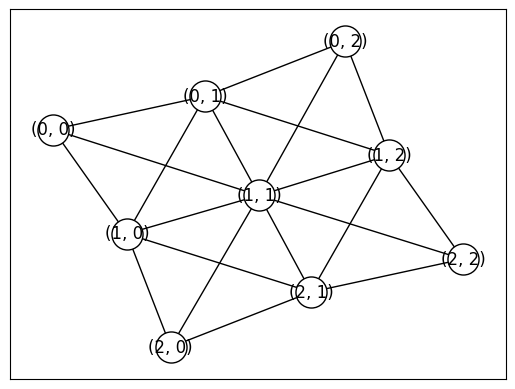

In [252]:
graph = generate_grid_with_Rb(3, 3, math.sqrt(2))
#graph.add_edges_from(gate_2q_list)
pos = nx.spring_layout(graph)  # 使用 spring 布局

nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='white', edgecolors='black')

# 绘制边
nx.draw_networkx_edges(graph, pos)

# 绘制节点标签
nx.draw_networkx_labels(graph, pos)

# 显示图形
plt.show()

In [332]:
g = nx.Graph()
g.add_edges_from([(2, 0), (1, 0), (1, 3), (0, 4)])

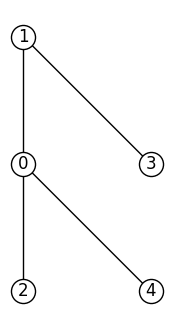

In [333]:
# 设置节点位置，使用 grid 布局，确保节点在方正布局中
pos = {0: (0, 1), 1: (0, 2), 2: (0, 0), 3: (1, 1), 4: (1, 0)}

# 绘制图
# 创建图形并设置大小
plt.figure(figsize=(4, 4))
plt.gca().set_aspect('equal', adjustable='box')
# 绘制图
nx.draw(g, pos, with_labels=True, node_size=300, node_color='white', edge_color='black', 
        linewidths=1, edgecolors='black', alpha=1)



# 显示图形
plt.show()

In [362]:
import qiskit.circuit.library as cir_library
qft_cir = cir_library.QFT(num_qubits=5,approximation_degree=0,
                                             do_swaps=True, inverse=False, insert_barriers=False,
                                             name='qft')
qft_cir = qft_cir.decompose()
print(qft_cir)

                                                                           »
q_0: ─────────────────────────────────────────────────────────────■────────»
                                                                  │        »
q_1: ──────────────────────────────────────■─────────────■────────┼────────»
                                           │       ┌───┐ │        │        »
q_2: ────────────────────■────────■────────┼───────┤ H ├─┼────────┼────────»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)  │        »
q_3: ──────■───────┤ H ├─┼────────■────────┼─────────────■────────┼────────»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                │P(π/16) »
q_4: ┤ H ├─■─────────────■─────────────────■──────────────────────■────────»
     └───┘                                                                 »
«                                              ┌───┐   
«q_0: ──────────■─────────────■────────■───────┤ H ├─X─
«               │       ┌───┐ │        │P

In [373]:
instructions = list(qft_cir.data)
del qft_cir.data[len(instructions)-1]
print(qft_cir)

                                                                           »
q_0: ─────────────────────────────────────────────────────────────■────────»
                                                                  │        »
q_1: ──────────────────────────────────────■─────────────■────────┼────────»
                                           │       ┌───┐ │        │        »
q_2: ────────────────────■────────■────────┼───────┤ H ├─┼────────┼────────»
                   ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4)  │        »
q_3: ──────■───────┤ H ├─┼────────■────────┼─────────────■────────┼────────»
     ┌───┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)                │P(π/16) »
q_4: ┤ H ├─■─────────────■─────────────────■──────────────────────■────────»
     └───┘                                                                 »
«                                              ┌───┐
«q_0: ──────────■─────────────■────────■───────┤ H ├
«               │       ┌───┐ │        │P(π/2) 

In [376]:
from qiskit import transpile
qft_cz = transpile(qft_cir, basis_gates=['cz', 'rx', 'ry', 'rz', 'h', 't'])
print(qft_cz)

global phase: 2.4053
     ┌───┐                                                                     »
q_0: ┤ H ├─────────────────────────────────────────────────────────────────────»
     ├───┤                                                                     »
q_1: ┤ H ├─────────────────────────────────────────────────────────────────────»
     ├───┤                                                      ┌──────────┐   »
q_2: ┤ H ├────────────────────────────────────────────────────■─┤ Rx(-π/8) ├─■─»
     ├───┤              ┌──────────┐   ┌─────────┐┌─────────┐ │ └──────────┘ │ »
q_3: ┤ H ├────────────■─┤ Rx(-π/4) ├─■─┤ Rx(π/4) ├┤ Rz(π/4) ├─┼──────────────┼─»
     ├───┤┌─────────┐ │ └──────────┘ │ ├─────────┤└─────────┘ │              │ »
q_4: ┤ H ├┤ Rz(π/4) ├─■──────────────■─┤ Rz(π/8) ├────────────■──────────────■─»
     └───┘└─────────┘                  └─────────┘                             »
«                                                                       »
«q_0: ────────

In [377]:
from qiskit.qasm2.export import dump
dump(qft_cz, 'Data/qft_cz_all.qasm')

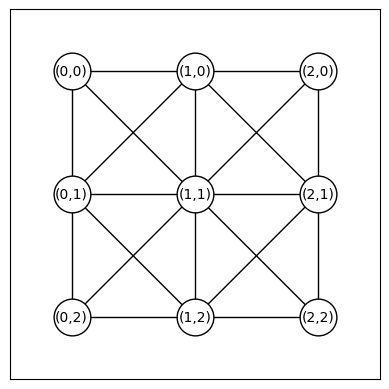

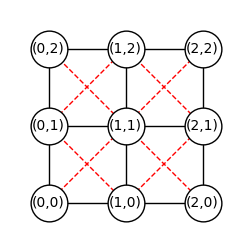

In [355]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

# 创建一个空图
g = nx.Graph()

g = nx.grid_2d_graph(3, 3)
g.add_edge((0,0),(1,1))
g.add_edge((0,1),(1,0))
g.add_edge((0,1),(1,2))
g.add_edge((0,2),(1,1))
g.add_edge((1,0),(2,1))
g.add_edge((1,1),(2,0))
g.add_edge((1,1),(2,2))
g.add_edge((1,2),(2,1))

# 添加3x3网格图的边
for i in range(3):
    for j in range(3):
        if i < 2:
            g.add_edge((i, j), (i+1, j))
        if j < 2:
            g.add_edge((i, j), (i, j+1))



# 设置节点位置，确保(0, 0)在左下角，(2, 2)在右上角
pos = {(i, j): (i, -j) for i in range(3) for j in range(3)}

# 创建图形并设置大小
plt.figure(figsize=(3, 3))

# 绘制水平和垂直边
nx.draw_networkx_edges(g, pos, edgelist=[e for e in g.edges if (e[0][0] == e[1][0] or e[0][1] == e[1][1])],
                       edge_color='black', style='solid')

# 绘制对角线边
nx.draw_networkx_edges(g, pos, edgelist=[e for e in g.edges if (e[0][0] != e[1][0] and e[0][1] != e[1][1])],
                       edge_color='red', style='dashed')


# 绘制节点
nx.draw_networkx_nodes(g, pos, node_size=700, node_color='white', edgecolors='black')

# 绘制节点标签
nx.draw_networkx_labels(g, pos, labels={(i, j): f'({i},{j})' for i in range(3) for j in range(3)},
                        font_size=10, font_color='black')


# 设置坐标轴比例和范围
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.5, 2.5)
plt.ylim(-2.5, 0.5)

# 反转y轴方向
plt.gca().invert_yaxis()

# 隐藏坐标轴
plt.gca().axis('off')

# 添加网格
plt.grid(True, which='both', linestyle='--', color='gray')

# 添加标题
#plt.title('3x3 Grid Graph with Labels')

# 显示图形
plt.show()


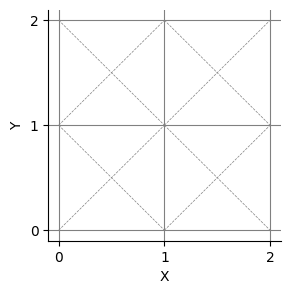

In [335]:
import matplotlib.pyplot as plt

# 示例数据：x 和 y 坐标
x = [0, 1, 2]
y = [0, 1, 2]

# 创建一个新的图形
plt.figure(figsize=(3, 3))

# 绘制坐标点
#plt.scatter(x, y, color='blue', label='Qubits')
grid_color = 'gray'
# 添加 x 轴和 y 轴标签
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.grid(True, which='both', color='gray', linestyle='-')

# 绘制每个小网格的对角线
for i in range(len(x)-1):
    for j in range(len(y)-1):
        plt.plot([x[i], x[i+1]], [y[j], y[j+1]], color='gray', linestyle='--', linewidth=0.5)
        plt.plot([x[i], x[i+1]], [y[j+1], y[j]], color='gray', linestyle='--', linewidth=0.5)
# 添加标题

points = [(0, 1), (0, 2), (0, 0), (1, 1), (1, 0)]
labels = ['0', '1', '2', '3', '4']

# 绘制坐标点并添加标签
#for (x, y), label in zip(points, labels):
#    plt.scatter(x, y, color='blue')  # 绘制坐标点
#    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')


ax = plt.gca()


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 设置坐标轴的刻度线
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# 添加 x 轴和 y 轴标签
plt.xlabel('X')
plt.ylabel('Y')
# 添加图例
#plt.legend()

# 显示图形
plt.show()
